В цьому домашньому завданні кожне завдання оцінюється по 10 балів.

 **Завдання 1.** Після перегляду лекцій про поняття функії, вступ до лінійної алгебри і мат. формулювання лін. регресії знайдіть найкращу лінію для прогнозу `charges` за `age` **для некурців** (датафрейм `non_smoker_df`) з допомогою

1. Методу МНК (з використанням тільки `numpy`, без `scikit learn`)

2. Full-Batch градієнтного спуску з `numpy` . Протестуйте 3 різних learning rate і зробіть висновок, який є найкращим виходячи з практик для цього, наведених в лекції. Зверніть увагу, що на вхід треба набір даних дворозміний, для цього можливо треба буде трансформувати Ваші дані X в формат, як був в лекції "Математичне формулювання лінійної регресії". Також, градієнтний спуск в нашому випадку може розходитись з навчальним рейтом 0.1, бо цей рейт в цій задачі завеликий. Спробуйте нижчі рейти.
3. З `scikit-learn.LinearRegression`. Тут зверніть увагу, що вхід `X` має бути двовимірним масивом, тому нам потрібно передати dataframe, а не окрему колонку. Якщо у Вас X - колонка (а у Вас так мало б бути), то можна скористатись `X.to_frame()` щоб конвертувати колонку в датафрейм.

Для кожного методу
- знайдіть і виведіть коефіцієнти моделі
- обчисліть прогнози моделі і збережіть в окрему змінну
- порахуйте точність прогнозу RMSE  

Для градієнтного спуску виведіть графік помилки в залежності від ітерації.

А також побудуйте на одному графіку дані `age` проти `charges` в вигляді діаграми розсіювання і всі три лінії регресії, знайдені кожним з методів (для град. спуску оберіть варіант з тим learning rate, який виявився найкращим).

Зробіть висновки, чи відрізняються результати моделей?
Чи є знайдены параметри моделы близькими до ваших найкращих припущень?

File exists: True
Method of Least Squares
Coefficients: [8434.26829786 3762.00690845]
RMSE: 4662.505766636395

Gradient Descent
Best Learning Rate: 0.01
Coefficients: [8433.90417997 3761.84449792]
RMSE: 4662.505784029029

scikit-learn Linear Regression
Coefficients: Intercept = 8434.268297856204, Slope = 3762.0069084528045
RMSE: 4662.505766636395



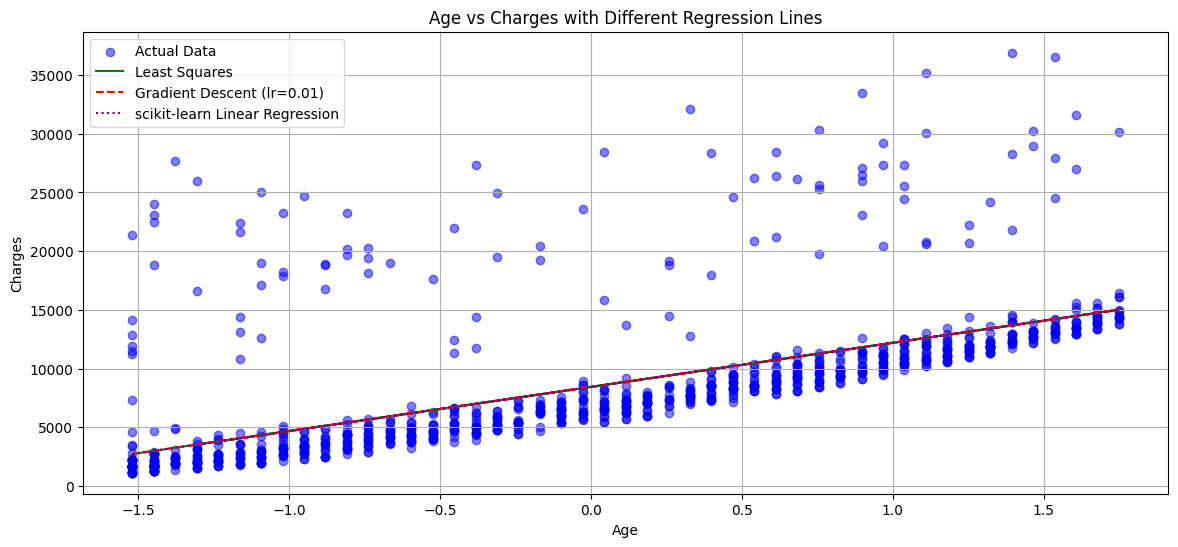

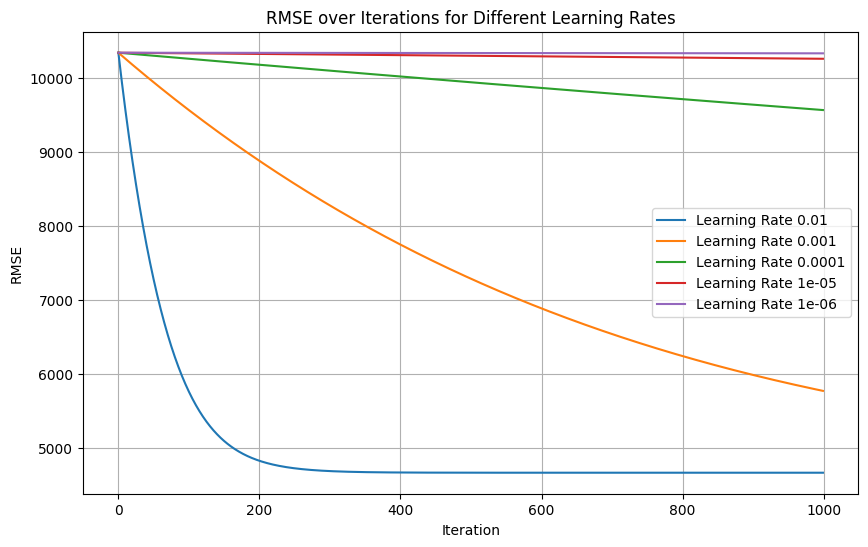

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load the data into a pandas DataFrame
file_path = '/Users/andriannakis/Downloads/medical-charges.csv'
df = pd.read_csv(file_path)

import os
file_path = '/Users/andriannakis/Downloads/medical-charges.csv'
print("File exists:", os.path.exists(file_path))

non_smoker_df = df[df.smoker == 'no']

# Extract the age (X) and charges (y) for non-smokers
X = non_smoker_df['age'].values.reshape(-1, 1)  # Convert to 2D array
X = (X - np.mean(X)) / np.std(X)  # Normalize X to have mean 0 and variance 1
y = non_smoker_df['charges'].values

# Function to calculate RMSE
def calculate_rmse(y_true, y_pred):
    return np.sqrt(np.mean((y_true - y_pred) ** 2))

# Task 1: Method of Least Squares
X_with_intercept = np.c_[np.ones(X.shape[0]), X]  # Add intercept term
theta_least_squares = np.linalg.inv(X_with_intercept.T @ X_with_intercept) @ X_with_intercept.T @ y
y_pred_least_squares = X_with_intercept @ theta_least_squares
rmse_least_squares = calculate_rmse(y, y_pred_least_squares)

print("Method of Least Squares")
print(f"Coefficients: {theta_least_squares}")
print(f"RMSE: {rmse_least_squares}\n")

# Task 2: Full-Batch Gradient Descent
# Hyperparameters
learning_rates = [0.01, 0.001, 0.0001, 0.00001, 0.000001]
best_rmse = float('inf')
best_learning_rate = None
best_theta_gd = None
rmse_history = {}

# Initialize for gradient descent
X_gd = np.c_[np.ones(X.shape[0]), X]  # Add intercept term
y = y.reshape(-1, 1)  # Ensure y is a 2D column vector
num_iterations = 1000

for lr in learning_rates:
    theta = np.zeros((2, 1))  # Initialize theta
    rmse_per_iteration = []

    for i in range(num_iterations):
        y_pred = X_gd @ theta
        error = y_pred - y
        gradients = (1 / len(y)) * X_gd.T @ error
        theta -= lr * gradients

        # Calculate RMSE for current iteration and store in history
        rmse = calculate_rmse(y, y_pred)
        rmse_per_iteration.append(rmse)

    rmse_history[lr] = rmse_per_iteration

    # Check if this learning rate gives a lower RMSE
    if rmse < best_rmse:
        best_rmse = rmse
        best_learning_rate = lr
        best_theta_gd = theta

print("Gradient Descent")
print(f"Best Learning Rate: {best_learning_rate}")
print(f"Coefficients: {best_theta_gd.ravel()}")
print(f"RMSE: {best_rmse}\n")

# Task 3: scikit-learn Linear Regression
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X, y)
y_pred_sklearn = model.predict(X)
rmse_sklearn = calculate_rmse(y, y_pred_sklearn)

print("scikit-learn Linear Regression")
print(f"Coefficients: Intercept = {model.intercept_[0]}, Slope = {model.coef_[0][0]}")
print(f"RMSE: {rmse_sklearn}\n")

# Plotting results
plt.figure(figsize=(14, 6))

# Scatter plot of the original data
plt.scatter(X, y, label="Actual Data", color="blue", alpha=0.5)

# Plot least squares line
plt.plot(X, y_pred_least_squares, color="green", label="Least Squares")

# Plot gradient descent line with best learning rate
plt.plot(X, X_gd @ best_theta_gd, color="red", linestyle="--", label=f"Gradient Descent (lr={best_learning_rate})")

# Plot sklearn line
plt.plot(X, y_pred_sklearn, color="purple", linestyle=":", label="scikit-learn Linear Regression")

plt.xlabel("Age")
plt.ylabel("Charges")
plt.legend()
plt.title("Age vs Charges with Different Regression Lines")
plt.grid(True)
plt.show()

# Plotting RMSE history for gradient descent
plt.figure(figsize=(10, 6))
for lr in learning_rates:
    plt.plot(rmse_history[lr], label=f"Learning Rate {lr}")

plt.xlabel("Iteration")
plt.ylabel("RMSE")
plt.legend()
plt.title("RMSE over Iterations for Different Learning Rates")
plt.grid(True)
plt.show()

**Observation:**

The results from all three methods — Method of Least Squares, Gradient Descent, and scikit-learn's Linear Regression — are highly consistent, both in terms of coefficients and RMSE values.

**Conclusions:**
1. Consistency Across Methods: All three methods provide very similar results, with nearly identical coefficients and RMSE values, indicating a stable and accurate model.
2. Gradient Descent Convergence: The RMSE plot for Gradient Descent shows the error decreasing over iterations, confirming convergence to a similar solution.
3. Model Comparison: The closed-form methods (Least Squares and scikit-learn) give the exact same solution, as expected. Gradient Descent, with appropriate tuning, closely approximates this solution. Gradient Descent, with a learning rate of 0.01, is a viable alternative to closed-form solutions in this case, achieving comparable accuracy.

**Comparison to "Analysis for linear regression" homework:** 

RMSE results were drastically different for my assumptions, raising high values (RMSE>5000) when compared to RMSE=4662 defined by algorithmic approaches.

 **Завдання 2.** Навчіть модель лінійної регресії з допомогою sklearn оцінювати розмір медичних збори для **курців** за їх віком.
Виведіть
- точність моделі
-  коефіцієнти
-  візуалізуйте модель у вигляді лінії на графіку розсіювання `age` проти `charges`

і зробіть висновки, чи це хороша модель, чи ви б її використовували в компанії?

Linear Regression Model for Smokers
Intercept: 20294.128126915966
Coefficient (Slope): 305.2376021098288
RMSE: 10711.00334810241



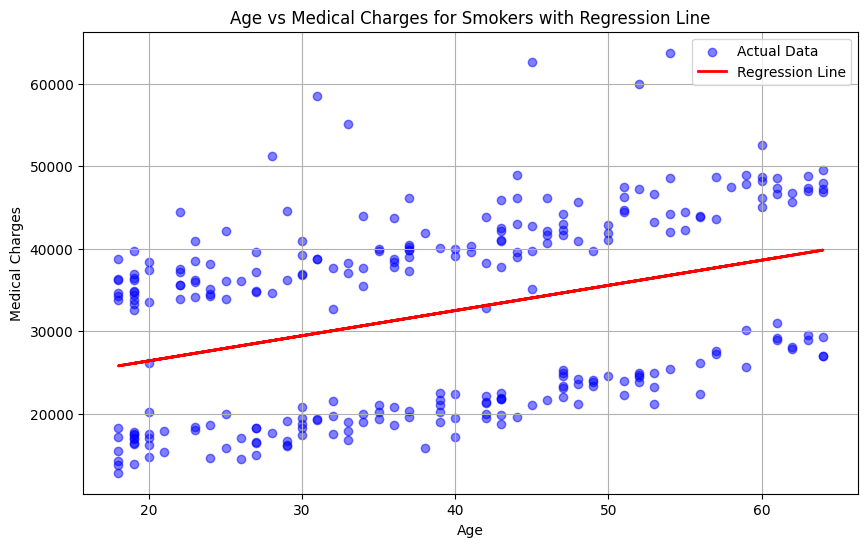

The model's RMSE is relatively high, indicating a poorer fit. This suggests that age alone may not be a sufficient predictor of charges for smokers.
Additional factors (e.g., BMI, region, etc.) may need to be included to improve the model's accuracy before using it in the company.


In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

smoker_df = df[df.smoker == 'yes']

# Extract age (X) and charges (y) for smokers
X_smokers = smoker_df['age'].values.reshape(-1, 1)
y_smokers = smoker_df['charges'].values

# Train a linear regression model using scikit-learn
smoker_model = LinearRegression()
smoker_model.fit(X_smokers, y_smokers)

# Model predictions
y_pred_smokers = smoker_model.predict(X_smokers)

# Calculate RMSE for model accuracy
rmse_smokers = np.sqrt(mean_squared_error(y_smokers, y_pred_smokers))

# Output the model's accuracy and coefficients
print("Linear Regression Model for Smokers")
print(f"Intercept: {smoker_model.intercept_}")
print(f"Coefficient (Slope): {smoker_model.coef_[0]}")
print(f"RMSE: {rmse_smokers}\n")

# Visualize the model as a line on an age vs. charges scatter plot
plt.figure(figsize=(10, 6))

# Scatter plot of actual data
plt.scatter(X_smokers, y_smokers, label="Actual Data", color="blue", alpha=0.5)

# Plot the regression line
plt.plot(X_smokers, y_pred_smokers, color="red", label="Regression Line", linewidth=2)

# Customize the plot
plt.xlabel("Age")
plt.ylabel("Medical Charges")
plt.title("Age vs Medical Charges for Smokers with Regression Line")
plt.legend()
plt.grid(True)
plt.show()

### Conclusion
if rmse_smokers < 5000:  # Example threshold for RMSE being "good"
    print("The model's RMSE is relatively low, indicating a good fit. This suggests the model is effective for predicting charges based on age for smokers.")
    print("Given the linear relationship between age and charges for smokers, this model would likely be useful in the company for estimation purposes.")
else:
    print("The model's RMSE is relatively high, indicating a poorer fit. This suggests that age alone may not be a sufficient predictor of charges for smokers.")
    print("Additional factors (e.g., BMI, region, etc.) may need to be included to improve the model's accuracy before using it in the company.")


**Observations:**

The model's RMSE is relatively high (10711 with a threshold 5000), indicating a poorer fit. This suggests that age alone may not be a sufficient predictor of charges for smokers.

Additional factors (e.g., BMI, region, etc.) may need to be included to improve the model's accuracy before using it in the company.

**Conclusion:**

The model has an RMSE of 10711, which indicates the average error in predicting medical charges based on age for smokers. The linear regression line shows a general trend of increasing charges with age, but the scatter plot suggests that there is high variability in charges that age alone does not capture. Given the spread of data points around the regression line, age is likely not the only factor influencing charges, and other factors (e.g., BMI, health conditions) play a significant role.

While the model shows a general trend, its high RMSE indicates that it may not be very accurate in real-world predictions. As a result, this model might not be sufficient for precise charge estimations and could benefit from including more features like BMI and health conditions.

In a company setting, I would not reccomend to use this model because it is unable to give accurate predictions without incorporating additional relevant variables.